In [484]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
np.random.seed(0)

In [487]:
!dir german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
with open("german-traffic-signs/train.p", "rb") as f:
    train_data =   pickle.load(f)
with open("german-traffic-signs/valid.p", "rb") as f:
    val_data =   pickle.load(f)
with open("german-traffic-signs/test.p", "rb") as f:
    test_data =   pickle.load(f) 

In [0]:
X_train = train_data["features"]
y_train = train_data["labels"]

X_val = val_data["features"]
y_val = val_data["labels"]

X_test = test_data["features"]
y_test = test_data["labels"]

In [0]:
data = pd.read_csv("german-traffic-signs/signnames.csv")

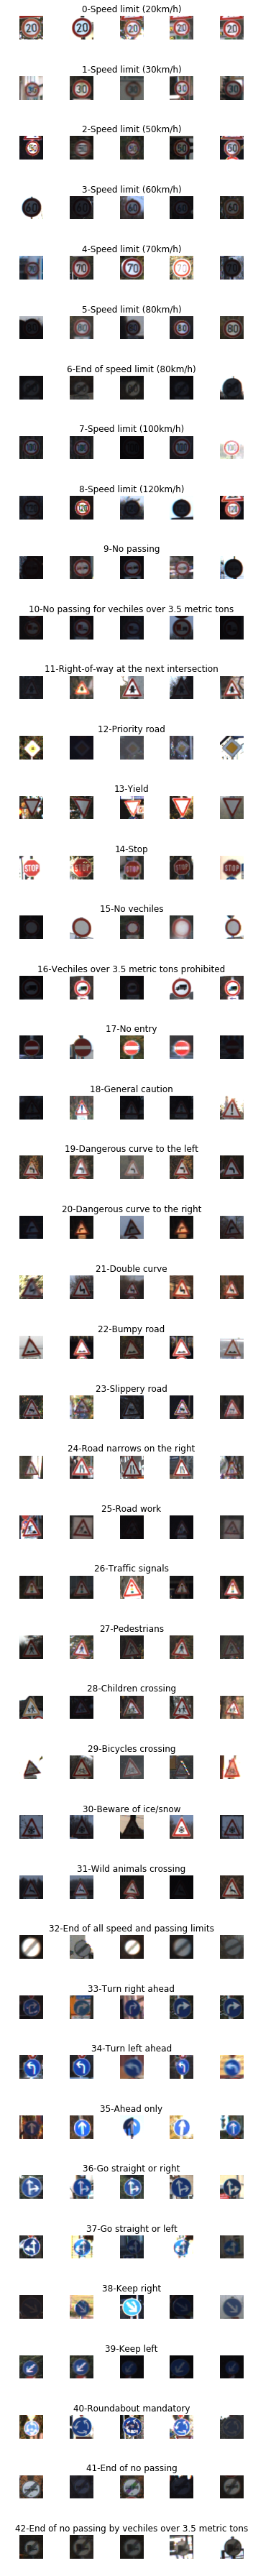

In [491]:
num_of_samples = []

cols = 5
num_classes = 43

fig, axis = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j) +"-"+row.SignName)
            num_of_samples.append(len(x_selected))




[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


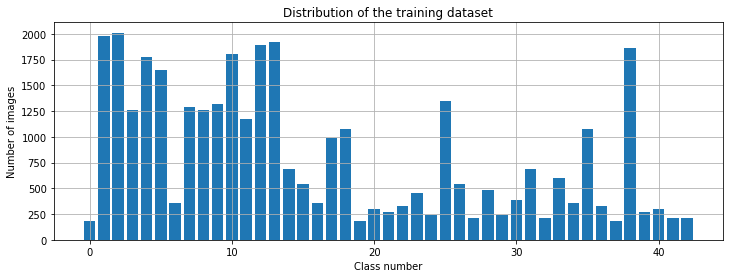

In [492]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.grid()

(32, 32, 3) Go straight or right


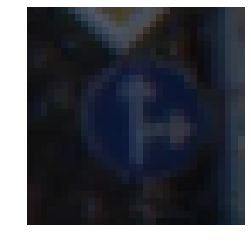

In [493]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape, data.iloc[y_train[1000], :].SignName)

In [0]:
grayscale = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalize = lambda img: cv2.equalizeHist(img)
preprocessing = lambda img: equalize(grayscale(img))/255

In [0]:
X_train = np.asarray(list(map(preprocessing, X_train)))
X_test = np.asarray(list(map(preprocessing, X_test)))
X_val = np.asarray(list(map(preprocessing, X_val)))

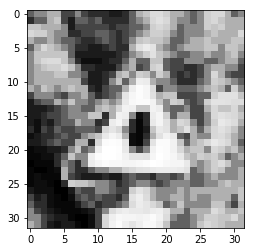

In [496]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)], cmap="gray")


In [0]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

In [0]:
datagen = ImageDataGenerator(width_shift_range=.1, height_shift_range=.1, rotation_range=10, zoom_range=.2, shear_range=.10, )
datagen.fit(X_train)

In [0]:
batches = datagen.flow(X_train, y_train, batch_size=20, )
X_batch, y_batch = next(batches)

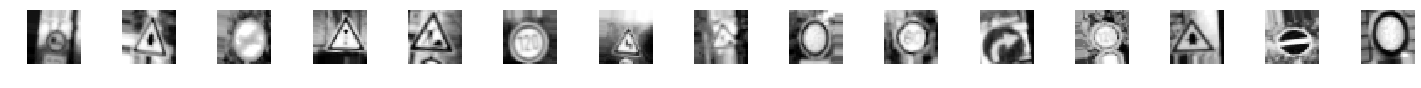

In [500]:
fig, axis = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
for i in range(15):
  axis[i].imshow(X_batch[i].reshape(32, 32), cmap="gray")
  axis[i].axis("off")

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [0]:
def modified_Model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=[32, 32, 1], activation="relu"))
  model.add(Conv2D(60, (5, 5), activation="relu"))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(Conv2D(30, (3, 3), activation="relu"))
  model.add(MaxPool2D((2,2)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(500, activation="relu"))
  model.add(Dropout(.5))
  model.add(Dense(num_classes, activation="softmax"))
  model.compile(Adam(.001), loss="categorical_crossentropy", metrics=["accuracy"]) 
  return model
            

In [0]:
model = modified_Model()

In [504]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 4, 4, 30)        

In [506]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 57s 29ms/step - loss: 1.2911 - acc: 0.6172 - val_loss: 0.1517 - val_acc: 0.9578
Epoch 2/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.4343 - acc: 0.8628 - val_loss: 0.0625 - val_acc: 0.9862
Epoch 3/10
2000/2000 [==============================] - 55s 28ms/step - loss: 0.3108 - acc: 0.9025 - val_loss: 0.0571 - val_acc: 0.9814
Epoch 4/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.2500 - acc: 0.9224 - val_loss: 0.0505 - val_acc: 0.9832
Epoch 5/10
2000/2000 [==============================] - 55s 28ms/step - loss: 0.2234 - acc: 0.9307 - val_loss: 0.0321 - val_acc: 0.9902
Epoch 6/10
2000/2000 [==============================] - 55s 27ms/step - loss: 0.2018 - acc: 0.9374 - val_loss: 0.0299 - val_acc: 0.9916
Epoch 7/10
2000/2000 [==============================] - 55s 28ms/step - loss: 0.1809 - acc: 0.9441 - val_loss: 0.0347 - val_acc: 0.9896
Epoch 8/10
2000/2000 [==========================

Text(0.5, 1.0, 'LOSS')

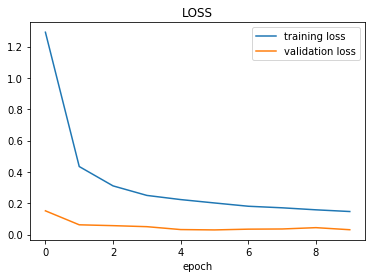

In [507]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training loss", "validation loss"])
plt.xlabel("epoch")
plt.title("LOSS")

Text(0.5, 1.0, 'accuracy')

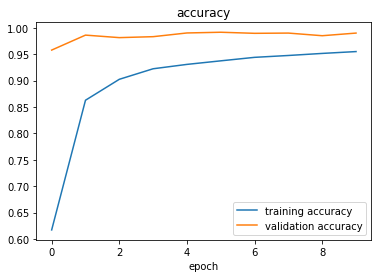

In [508]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["training accuracy", "validation accuracy"])
plt.xlabel("epoch")
plt.title("accuracy")

In [510]:
score = model.evaluate(X_test, y_test )

12630/12630 [==============================] - 2s 185us/sample - loss: 0.1130 - acc: 0.9691


In [511]:
score

[0.11303270135995853, 0.96912116]

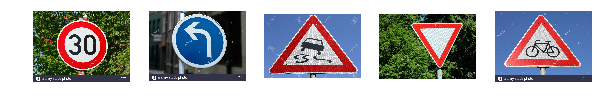

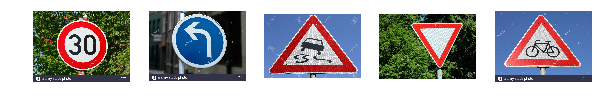

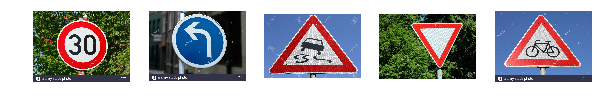

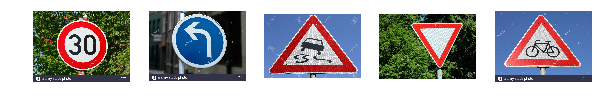

In [533]:
import requests
from PIL import Image
urls =  ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg",
        "https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg",
        "https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg",
        "https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg",
        "https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg"]
def get_image(img):
    r = requests.get(url, stream=True)
    img = Image.open(r.raw)
    return img
images = []
for url in  urls:
    images.append(get_image(url))
    
fig, axis = plt.subplots(ncols=len(urls), nrows = 1, figsize=(10,10),)
for i in range(len(urls)):
     axis[i].imshow(images[i])
     axis[i].axis("off")


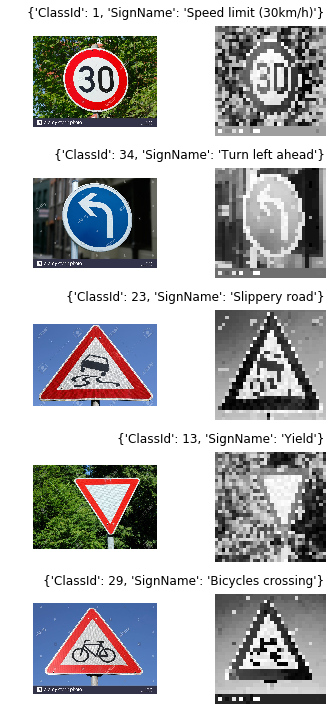

In [537]:
def cvt_img(img):
  img = np.asarray(img)
  img = cv2.resize(img, (32, 32))
  img = preprocessing(img)
  return img

def img_predict(img):  
  img = img.reshape(1, 32, 32, 1)
  return str(data.iloc[model.predict_classes(img)[-1],:].to_dict())

images_gray = list(map(cvt_img, images))

fig, axis = plt.subplots(nrows=len(images_gray), ncols = 2, figsize=(len(images_gray), 10))
fig.tight_layout()
for i, image in enumerate(images_gray):
    axis[i][1].set_title(img_predict(image), pad=10, loc="right")
    axis[i][0].imshow(images[i])
    axis[i][1].axis("off")
    axis[i][1].imshow(image, cmap='gray') 
    axis[i][0].axis("off")
